<a href="https://colab.research.google.com/github/pltnhan/machinelearningplatforms/blob/main/DecisionTreeClassification_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Phạm Lê Thanh Nhàn
## ITDSIU20073

# Decision Trees

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import sys
os.chdir('/content/drive/MyDrive/IU Material/Machine Learning Platforms/Lab3')
sys.path.append("/content/drive/MyDrive/IU Material/Machine Learning Platforms/Lab3")
!pwd

/content/drive/MyDrive/IU Material/Machine Learning Platforms/Lab3


### Data loading

We are going to use the churn data-set and do a binary classification task on it.

In [ ]:
df = pd.read_csv("telco_customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


We need to find the data points that doesn't have `TotalCharges` value and remove them.

In [ ]:
# CODE
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(subset=['TotalCharges'], inplace=True)

In [ ]:
df['TotalCharges'].dtype

dtype('float64')

We will use the following features:

In [ ]:
X = df[["tenure", "MonthlyCharges", "TotalCharges"]]
y = df["Churn"]

Encoding the categorical features with __Label Encoding__:

In [ ]:
# CODE
def class_convert(churn):
    if churn=='Yes':
        return 1
    else:
        return 0

In [ ]:
y=y.apply(class_convert)

Split the data to train and test

In [ ]:
# split train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

Build Decision tree model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini',max_depth=None)

Fit data

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

Test accuracy

In [ ]:
predictions = dtree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1566
           1       0.45      0.48      0.46       544

    accuracy                           0.71      2110
   macro avg       0.63      0.64      0.63      2110
weighted avg       0.72      0.71      0.72      2110



In [ ]:
cm=confusion_matrix(y_test,predictions)
print(cm)
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))

[[1244  322]
 [ 284  260]]
Accuracy of prediction: 0.713


depth of the decision tree

In [ ]:
print("Depth:", dtree.get_depth())

Depth: 34


### Tuning the depth of the tree:

The `max_depth` identifies the maximum depth of the tree. By default, it is set to None which means that the nodes are expanded until all leaves are pure or until all leaves contain less than `min_samples_split` samples (which is by default set to 2). Therefore with these default paramters our decision tree will have a very large depth and it will __over-fit__ on the training data.

#### Exercise:
Tune the `max_depth` parameter and find the best value for it. What is the precision and recall for the best decision-tree classifier?

In [ ]:
depths = []
scores = []

# Train decision trees with different depths and record scores
for depth in range(1, 21):  # Try depths from 1 to 20
    # Train decision tree classifier with current depth
    dtree1 = DecisionTreeClassifier(criterion='gini', max_depth=depth)
    dtree1.fit(X_train, y_train)

    # Calculate accuracy on test set
    score = dtree1.score(X_test, y_test)

    # Append depth and score to lists
    depths.append(depth)
    scores.append(score)

Plot the score v.s depth of tree

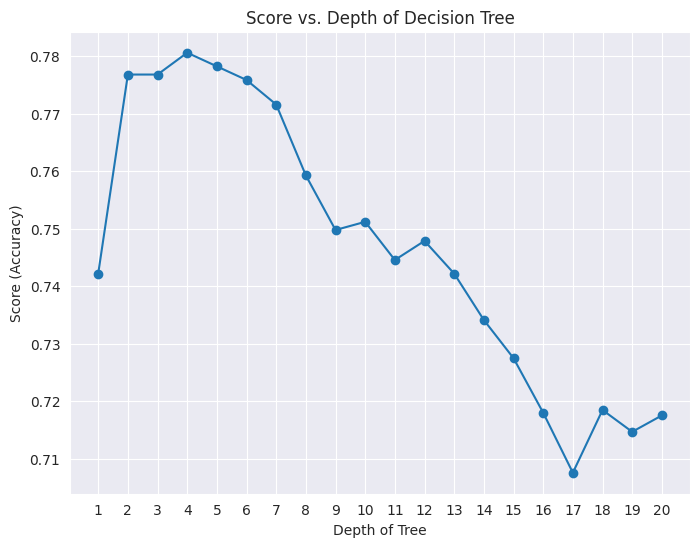

In [ ]:
# Plot score vs. depth
plt.figure(figsize=(8, 6))
plt.plot(depths, scores, marker='o', linestyle='-')
plt.title('Score vs. Depth of Decision Tree')
plt.xlabel('Depth of Tree')
plt.ylabel('Score (Accuracy)')
plt.grid(True)
plt.xticks(depths)
plt.show()

best depth is 4

In [ ]:
dtree2 = DecisionTreeClassifier(criterion='gini',max_depth=4)

In [ ]:
dtree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [ ]:
prediction2 = dtree2.predict(X_test)

In [ ]:
print(classification_report(y_test,prediction2))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1566
           1       0.59      0.50      0.54       544

    accuracy                           0.78      2110
   macro avg       0.71      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110



### Feature importance
The importance of a feature is computed as the (normalized) total reduction of the criterion (which is entropy in this case) brought by that feature.

In [ ]:
print(dtree2.feature_importances_)

[0.55683336 0.40770587 0.03546077]


What is the most important feature in this classification task? Does it make sense?

It is "tenure".

"Tenure" is the length of time a customer has been subscribed, which often turns out to be a crucial predictor. This is because longer-tenured customers may be less likely to churn compared to newer customers.

Hence, it makes sense.

### Visualizing the decision tree

Let's visualize the decision tree with the optimum `max_depth` parameter.

In [ ]:
!pip install pydotplus
!pip install graphviz

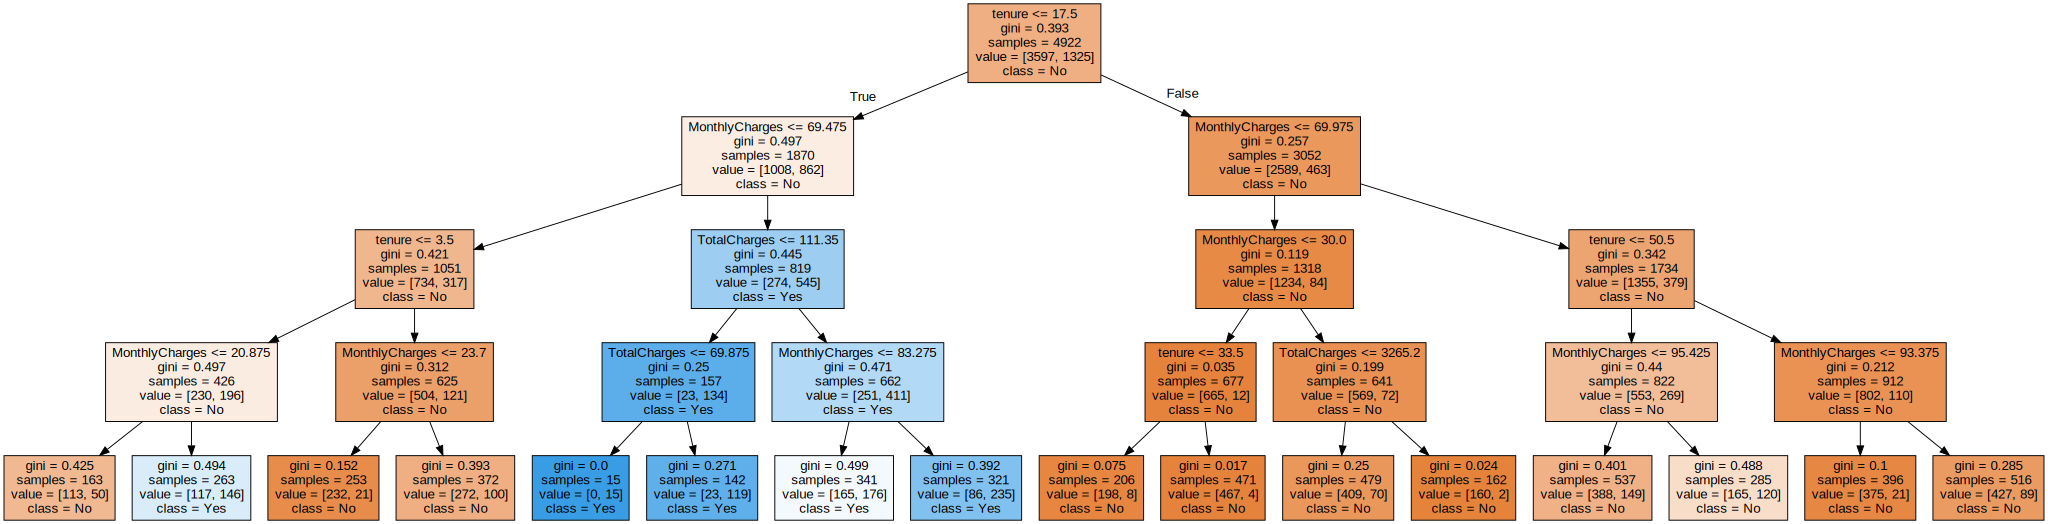

In [ ]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

graph = Source(export_graphviz(dtree2, out_file=None
   , feature_names=X_train.columns, class_names=['No', 'Yes']
   , filled = True))
display(SVG(graph.pipe(format='svg')))

## Exercise: decision tree regressor

In this exercise we will use decision trees for a regression problem. We will use the Boston Housing dataset. This data-set contains information about houses in the suburbs of Boston. There are 506 samples and 14 attributes. For simplicity and visualization purposes, we will only use two — MEDV (median value of owner-occupied homes in $1000s) as the target and LSTAT (percentage of lower status of the population) as the feature.

In [ ]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

df = pd.DataFrame(data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])

# Drop unwanted columns
df = df[['LSTAT']]
df['MEDV'] = target

df.head()

,LSTAT,MEDV
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


### train-test split

In [ ]:
# TO DO
X_train, X_test, y_train, y_test = train_test_split(df['LSTAT'], df['MEDV'], test_size=0.30)

### Decision tree regressor
Now it is time to find a model which fits this data. Note that as we have a regression problem here, we need a criterion which is suitable for a continuous output. Tune the maximum depth of the tree and find the best value. What is the test error for this regressor?

In [ ]:
# TO DO: training the decision tree regressor

# an example of decision tree regressor with depth=3

from sklearn.tree import DecisionTreeRegressor

X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

# Initialize and train the decision tree regressor
dt = DecisionTreeRegressor(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [ ]:
# TO DO: tune the max_depth parameter
depthss = []
scoress = []

for depth in range(1, 21):  # Try depths from 1 to 20
    dt1 = DecisionTreeRegressor(max_depth=depth)
    dt1.fit(X_train, y_train)

    # Calculate accuracy on test set
    score = dt1.score(X_test, y_test)

    # Append depth and score to lists
    depthss.append(depth)
    scoress.append(score)

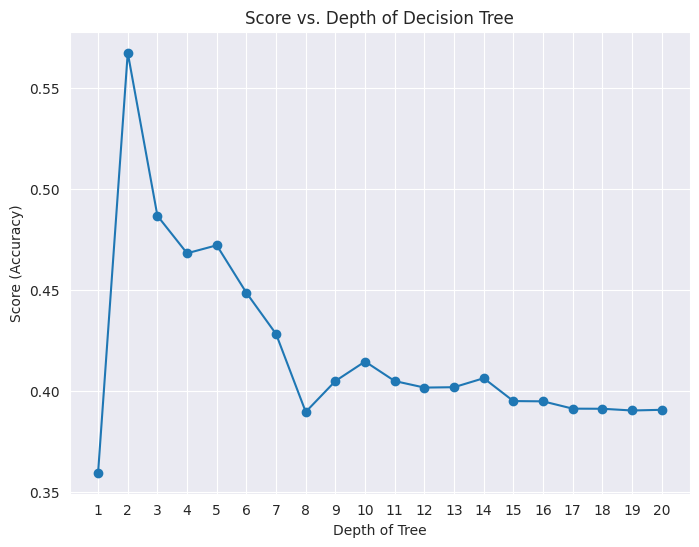

In [ ]:
# Plot score vs. depth
plt.figure(figsize=(8, 6))
plt.plot(depthss, scoress, marker='o', linestyle='-')
plt.title('Score vs. Depth of Decision Tree')
plt.xlabel('Depth of Tree')
plt.ylabel('Score (Accuracy)')
plt.grid(True)
plt.xticks(depthss)
plt.show()

In [ ]:
# TO DO: test error for the best decision tree regressor
dt2 = DecisionTreeRegressor(max_depth=2)

In [ ]:
dt2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [ ]:
prediction3 = dt2.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
print("Error for the best decision tree regressor:", mean_absolute_error(y_test, prediction3))

Error for the best decision tree regressor: 4.388451000256361



Plot the data points together with the regression tree line fit to see how good the model fits the data.

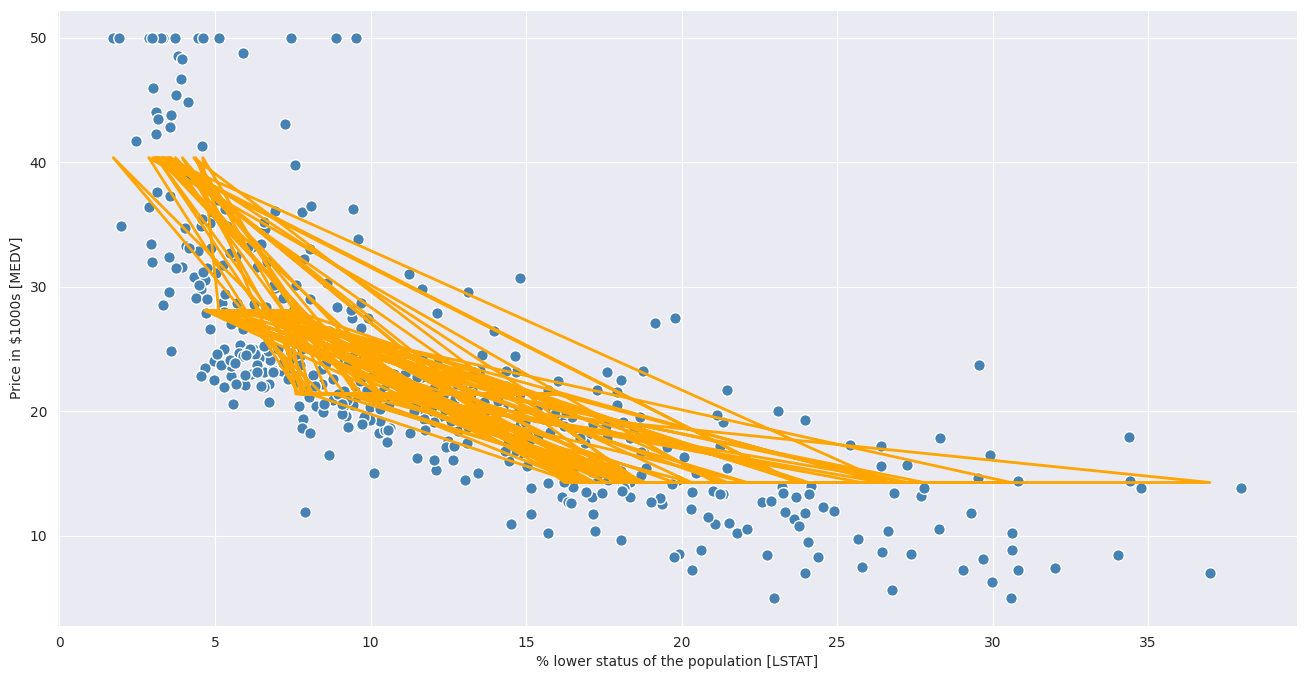

In [ ]:
# TO DO
plt.figure(figsize=(16, 8))
plt.scatter(df['LSTAT'], df['MEDV'], c='steelblue', edgecolor='white', s=70)   # Plot actual target against features
plt.plot(X_test, prediction3, color='orange', lw=2)               # Plot predicted target against features
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()

The orange lines closely follows the trend of the data points, it suggests the model has successfully captured the underlying patterns in the data.

This indicates a good fit between the model and the data.